<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/02_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas for Data Analysis

I think rather than getting busy with another scripting langauge, we should buckle down and try to get some `pandas` essentials under our belts.  My goal here is to not load any other library, think I can succeed?

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)
head = ['Class','Alcohol','MalicAcid','Ash','AlcalinityAsh','Magnesium','Phenols','Flavanoids','NonflavanoidPhenols','Proanthocyanins','ColorIntensity','Hue','OD280/OD315','Proline'] 
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names more info on the data file than you could ever use!
df.columns = head
df.head() 

,Class,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,Phenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Why do I keep calling my dataset `df`, TRADITION!  No really you might consider using something more descriptive.  You should note that I demanded that the columns have descriptive names because it makes the rest easier but was not nesseccary!

## Basics About Your Data

The first is just the column names but sometimes it can be nice to have that as a list

In [3]:
df.columns

Index(['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityAsh', 'Magnesium',
       'Phenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins',
       'ColorIntensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

Size and shape are two excellent resources.  How many entries and how many rows and columns

In [11]:
print('Size:' ,df.size)
print('Shape', df.shape)

178*14

Size: 2492
Shape (178, 14)
Unique Entries Class                    3
Alcohol                126
MalicAcid              133
Ash                     79
AlcalinityAsh           63
Magnesium               53
Phenols                 97
Flavanoids             132
NonflavanoidPhenols     39
Proanthocyanins        101
ColorIntensity         132
Hue                     78
OD280/OD315            122
Proline                121
dtype: int64


2492

Not sure I'll use this one again but it gives the data types which could be important for us.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                178 non-null    int64  
 1   Alcohol              178 non-null    float64
 2   MalicAcid            178 non-null    float64
 3   Ash                  178 non-null    float64
 4   AlcalinityAsh        178 non-null    float64
 5   Magnesium            178 non-null    int64  
 6   Phenols              178 non-null    float64
 7   Flavanoids           178 non-null    float64
 8   NonflavanoidPhenols  178 non-null    float64
 9   Proanthocyanins      178 non-null    float64
 10  ColorIntensity       178 non-null    float64
 11  Hue                  178 non-null    float64
 12  OD280/OD315          178 non-null    float64
 13  Proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Similarly you can ask how many different values are in each column

In [12]:
df.nunique()

Class                    3
Alcohol                126
MalicAcid              133
Ash                     79
AlcalinityAsh           63
Magnesium               53
Phenols                 97
Flavanoids             132
NonflavanoidPhenols     39
Proanthocyanins        101
ColorIntensity         132
Hue                     78
OD280/OD315            122
Proline                121
dtype: int64

We saw this one last time and may see it again soon!

In [14]:
df.describe()

,Class,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,Phenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Acsessing The Data

The above commands were on the entire dataset but sometimes we might want to consider only a subset.  Let's see some tools for that!

The most straight forward is by column name although it does not work if you have spaces in column names (don't do that!)

In [15]:
df.Alcohol

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64

Or

In [17]:
df['Alcohol']

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64

Or if you want a dataframe still

In [18]:
df[['Alcohol']]

,Alcohol
0,14.23
1,13.20
2,13.16
3,14.37
4,13.24
...,...
173,13.71
174,13.40
175,13.27
176,13.17


If you need multiple columns

In [19]:
df[['Alcohol','Ash']]

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
...,...,...
173,13.71,2.45
174,13.40,2.48
175,13.27,2.26
176,13.17,2.37


Let's get a little more exotic use `loc` You give it the row and the column.  There are some great tricks here.

In [29]:
df.loc[:,'Ash']#all
df.loc[1:3,'Ash']#1,2,3
df.loc[[1,5,7],'Ash']#1,5,7

1    2.14
5    2.45
7    2.61
Name: Ash, dtype: float64

You may want to try some of those!

There is also `iloc`.  It is similar but you have to use columns by number not name.

In [31]:
df.iloc[:-10,3]#last 10 entries still 'Ash'

0      2.43
1      2.14
2      2.67
3      2.50
4      2.87
       ... 
163    2.35
164    2.30
165    2.26
166    2.60
167    2.30
Name: Ash, Length: 168, dtype: float64

Lastly, what if we want data by a condition?  `loc` will work for this.

In [34]:
df.loc[df.Class==1].head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,Phenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


But I like to avoid nesting if I can.  I suggest we use the `query` command.

In [39]:
df.query('Class ==1').head()#head is just here to limit the output

,Class,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,Phenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


`query` will allow me to combine multiple statements!

In [40]:
df.query('Class ==1 and Ash >2.8')

,Class,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,Phenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
36,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880


## More Advanced Analysis

The melt command is very powerful and does some nifty things to large datasets quickly!

In [42]:
df_melt = df.melt(id_vars = 'Class',
                  value_vars = ['Flavanoids','Hue'],
                  var_name = 'colmuns')
df_melt.tail()

,Class,colmuns,value
351,3,Hue,0.64
352,3,Hue,0.70
353,3,Hue,0.59
354,3,Hue,0.60
355,3,Hue,0.61


This is the same data as before but now *Flavanoids* and *Hue* are in a column and there values became anothe column.  Why would this help us?  Some time this is referred to as longer data and gives us a way graph (like we saw earlier where I got this code from)  

Next is `pivot`.  It would work best on a dataset with multiple categorical variables.  It would take a long table and return a wide table.  I cannot use it here without just undoing what I did above.  

In [45]:
df_melt.pivot(columns = 'colmuns', values = 'value')

colmuns,Flavanoids,Hue
0,3.06,NaN
1,2.76,NaN
2,3.24,NaN
3,3.49,NaN
4,2.69,NaN
...,...,...
351,NaN,0.64
352,NaN,0.70
353,NaN,0.59
354,NaN,0.60


I actually couldn't undo that because it was not clear which value for *Flavanoids* went with which *Hue*.  If I could have told, I would have give it `index = 'Index'`

`groupby` is excellent!  You need a statistic with it too.

In [47]:
df.groupby(by = 'Class').mean()

,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,Phenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
Class,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


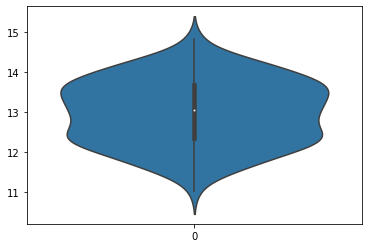

In [ ]:
sns.violinplot(data = df.Alcohol)

I couldn't really see the shape above so I just included one dataset.  I think these are really niffty!  The violin plot shows more than the box plot and the histogram.

## Your Turn

1. Create a new Jupyter notebook.  Title and put your name on your document
2. Load Libraries
3. Gather the iris dataset and load it into your notebook.  https://raw.githubusercontent.com/nurfnick/Data_Viz/main/iris.csv
4. Examine the dataset.
5. Create a bar chart of the categorical variable
5. Create visualizations of your favorite variable
  1. Histogram
  2. Box Plot
  3. Violin
7. Compute statistics accompanying the visualizations created
8. Save your notebook to GitHub and share the link in the blackboard assignment